# Figure 2

In [2]:
# Load Function Definitions 

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 8}
matplotlib.rc('font', **font)

from pro_plot import barPlotter, curvePlotter
from standards import *

DataPath = "CA-prod-report"
OutPath = "Graphs"

## Gene Distribution

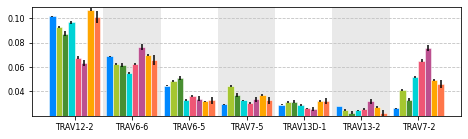

In [3]:
#  OPTIONS  #

GENE = "V"
n_choice = 7
figsize = ( n_choice * 1.1, 2 )

df = pd.read_csv(f'{DataPath}/CA-prod-{GENE}_usage.csv', index_col=0 )

columns = [c for c in df.columns if 'err' not in c]
errorbars = [ c + ' err' for c in columns ]
colors = [ EXP_KOL[c] for c in columns ] 

df = df.iloc[np.arange(n_choice)]
ax = barPlotter( df, colors=colors, hatch=None, grid=True,
                columns=columns, figsize=figsize, errorbars=errorbars, rotation=0 )
plt.margins(0)
'''
plt.legend(ncol=1, shadow=False, bbox_to_anchor=(1,.5), loc='center left',
            edgecolor='inherit', framealpha=1)
'''
for i in np.arange( 1, ax.get_xlim()[1]-1, 2 ).astype(int) :
    ax.axvspan( i, i+1, 0, 1, alpha=0.5, color=GREYS_DIC['silver'], ec=None, zorder=-10)

plt.savefig( f"{OutPath}/fig2A.pdf", bbox_inches='tight' )
plt.show()

## Length Distribution

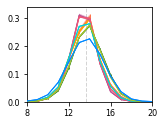

In [4]:
#  OPTIONS  #

df = pd.read_csv(f'{DataPath}/CA-prod-lengths.csv', index_col=0 )

figsize = ( 2.25, 1.75 )
    
columns =  ['gen'] + HEADERS
errorbars = [c + ' err' for c in columns]
colors = [ EXP_KOL[c] for c in columns ]
linestyle = ['-'] + ['-'] * len(HEADERS)
markerstyle = [''] + [''] * len(HEADERS)
zorder = np.arange(len(columns))[::-1]
zorder[0] = len(columns)

ax = curvePlotter(
    df, colors=colors, grid=False, legend=False, linestyle=linestyle, markerstyle=markerstyle,
    columns=columns, figsize=figsize, zorder=zorder, errorbars=errorbars, fill_error=True, lw=1
    )

plt.margins(0)
ax.set_xlim([8, 20])
ax.set_ylim([0, np.max(df.values) * 1.1 ])

ax.set_xticks([8,12,16,20])

average_lengths = np.matmul( df.index.values, df[columns].values )
ax.axvline(x=average_lengths[0], zorder =-2, ls='--', lw=1, color=GREYS_DIC['silver'])

plt.savefig( f"{OutPath}/fig2B.pdf", bbox_inches='tight' )

plt.show()

## Single Amino Acid Usage

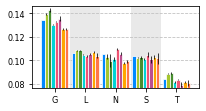

In [5]:
from thymmatu.graphics.pro_plot import barPlotter

#  OPTIONS  #
Num = 1
n_show_idx = 5
figsize = ( 3, 1.5 )

df = pd.read_csv(f'{DataPath}/CA-single_aa_usage.csv', index_col=0 )
df = df.sort_values(by="gen",ascending=False).head(n=n_show_idx)

# BARPLOT
columns = ['gen'] + HEADERS
colors = [ EXP_KOL[c] for c in columns ] 
errorbars = [None] + [ c + " err" for c in HEADERS ]

ax = barPlotter( df, colors=colors, grid=True, lw=0.75,
                columns=columns, figsize=figsize, errorbars=errorbars, rotation=0 )

#plt.legend(ncol=1, shadow=False, loc='center left', bbox_to_anchor=(1, 0.5), edgecolor='inherit', framealpha=1)

for i in np.arange( 1, ax.get_xlim()[1]-1, 2 ).astype(int) :
    ax.axvspan( i, i+1, 0, 1, alpha=0.5, 
                color=GREYS_DIC['silver'], ec=None, zorder=-10)

plt.savefig( f"{OutPath}/fig2C.pdf", bbox_inches='tight' )

plt.show()

## PCA

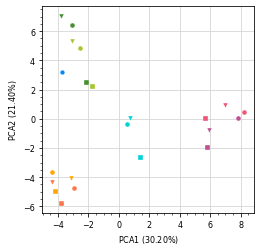

In [6]:
marker = { 'P' : 'H', '6' : 'o', '8' : 's', '9' : 'v' }
Perc = pd.read_csv( f"{DataPath}/pca-principal_percentuage.csv",sep=',')
Perc = Perc[ np.logical_and(Perc.Chain=="CA",Perc.Gene==GENE) ]

# load erez PCA
PCA_erez = pd.read_csv( f'{DataPath}/CA-V-pca_export.csv', index_col=0 )

# define colors
PCA_erez['color'] = [ EXP_KOL[ CC_to_HEAD[cc] ] if cc != 'Pgen' else EXP_KOL['gen'] for cc in PCA_erez['phenotype']  ]

# define unique labels
PCA_erez['aux'] = [ CC_to_HEAD[cc] if cc != 'Pgen' else CC_to_HEAD['gen'] for cc in PCA_erez['phenotype'] ]
PCA_erez['label'] = '_'
PCA_erez.at[PCA_erez['aux'].drop_duplicates().index, 'label'] = PCA_erez['aux'].drop_duplicates()
PCA_erez.drop(columns='aux')

fig, ax = plt.subplots(figsize = (3.8, 3.8))

# plt PCA scatter
for _, row in PCA_erez.iterrows() :
    ax.scatter( row['Dim.1'], row['Dim.2'], s=25, label=row.label, c=row.color, 
               ec='white', lw=.35, zorder=2, marker=marker[row['mouse']] )

# plt options
ax.set_xlabel("PCA1 $(" + "%.2f" % Perc['Dim.1'].values + "\%)$")
ax.set_ylabel("PCA2 $(" + "%.2f" % Perc['Dim.2'].values + "\%)$")

ax.minorticks_on()
ax.axes.grid(which="major", color=GREYS_DIC["silver"], zorder = -5)

ax.set_axisbelow(True)

plt.savefig( f"{OutPath}/fig2D.pdf", bbox_inches='tight' )

plt.show()

### insert

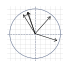

In [7]:
# load erez PCA
vec_erez = pd.read_csv( f'{DataPath}/CA-V-loadings_export.csv', index_col=0 )

fig, ax = plt.subplots(figsize = (1,1))

# circle and axis
plt.axis((-1.1, 1.1, -1.1 ,1.1))
ax.add_patch( plt.Circle((0, 0), 1, fill=False, lw=0.5, ec=GREYS_DIC["pidgeon"]) )
ax.axvline(x=0, lw=0.5, color=GREYS_DIC["pidgeon"], ls="--", zorder=-5)
ax.axhline(y=0, lw=0.5, color=GREYS_DIC["pidgeon"], ls="--", zorder=-5)


# plt vector arrows
prop = dict(arrowstyle="->,head_width=0.2,head_length=0.3",
            lw=0.5, shrinkA=0, shrinkB=0)
for _, row in vec_erez.iterrows() :
    norm = np.sqrt(np.sum(np.power(row[['x','y']],2)))
    norm = 1
    x = row['x'] / norm
    y = row['y'] / norm
    ax.annotate("", xy=(x,y), xytext=(0,0), arrowprops=prop)

# hide spines and ticks but not grid
_ = [ ax.spines[s].set_visible(False) for s in ax.spines ]
ax.minorticks_on()
ax.tick_params(which='both', direction='out', length=0, width=0 )
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.axes.grid(which="both", lw=.5, color=GREYS_DIC["silver"], alpha=0.5, zorder = -10)
ax.set_axisbelow(True)

plt.savefig( f"{OutPath}/fig2D-insert.pdf", bbox_inches='tight' )

plt.show()